In [73]:
import sys
import numpy as np
import pandas as pd
from skimage.io import imread
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

from keras import preprocessing 
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

# DATA LOAD

In [74]:
train_folder = "images_background"
val_folder = 'images_evaluation'
save_path = 'data'

In [75]:
def loadimgs(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)
        lang_dict[alphabet] = [curr_y,None]
        print (lang_dict[alphabet])
        alphabet_path = os.path.join(path,alphabet)
        print('alpha',alphabet_path)
        dany=[]
        # every letter/category has it's own column in the array, so  load seperately
        print(sorted(os.listdir(alphabet_path)))
        print(os.listdir(alphabet_path))
       
        for letter in sorted(os.listdir(alphabet_path)):
            cat_dict[curr_y] = (alphabet, letter)
            print (cat_dict[curr_y])
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
            
            # read all the images in the current category
            print('letter_path',letter_path)
            for filename in sorted(os.listdir(letter_path)):
                #print('filename',filename)
                image_path = os.path.join(letter_path, filename)
                print (image_path)
                image = imread(image_path)
                category_images.append(image)
                #print(category_images)
                y.append(curr_y)
                #print ('y')
                #print(y)
            try:
                X.append(np.stack(category_images))
            # edge case  - last one
            except ValueError as e:
                #print(e)
                print("error - category_images:", category_images)
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

In [76]:
X,y,c=loadimgs(train_folder)
with open(os.path.join(save_path,"train.pickle"), "wb") as f:
    pickle.dump((X,c),f)

loading alphabet: Arcadian
[0, None]
alpha images_background/Arcadian
['character01', 'character02', 'character03', 'character04', 'character05', 'character06', 'character07', 'character08', 'character09', 'character10', 'character11', 'character12', 'character13', 'character14', 'character15', 'character16', 'character17', 'character18', 'character19', 'character20', 'character21', 'character22', 'character23', 'character24', 'character25', 'character26']
['character18', 'character12', 'character23', 'character03', 'character26', 'character11', 'character14', 'character01', 'character22', 'character04', 'character25', 'character09', 'character07', 'character19', 'character24', 'character08', 'character10', 'character02', 'character05', 'character13', 'character17', 'character16', 'character06', 'character21', 'character20', 'character15']
('Arcadian', 'character01')
letter_path images_background/Arcadian/character01
images_background/Arcadian/character01/0001_01.png
y
images_backgroun

y
('Arcadian', 'character22')
letter_path images_background/Arcadian/character22
images_background/Arcadian/character22/0022_01.png
y
images_background/Arcadian/character22/0022_02.png
y
images_background/Arcadian/character22/0022_03.png
y
images_background/Arcadian/character22/0022_04.png
y
images_background/Arcadian/character22/0022_05.png
y
images_background/Arcadian/character22/0022_06.png
y
images_background/Arcadian/character22/0022_07.png
y
images_background/Arcadian/character22/0022_08.png
y
images_background/Arcadian/character22/0022_09.png
y
images_background/Arcadian/character22/0022_10.png
y
images_background/Arcadian/character22/0022_11.png
y
images_background/Arcadian/character22/0022_12.png
y
images_background/Arcadian/character22/0022_13.png
y
images_background/Arcadian/character22/0022_14.png
y
images_background/Arcadian/character22/0022_15.png
y
images_background/Arcadian/character22/0022_16.png
y
images_background/Arcadian/character22/0022_17.png
y
images_background/

images_background/Anglo-Saxon_Futhorc/character02/0297_01.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_02.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_03.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_04.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_05.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_06.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_07.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_08.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_09.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_10.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_11.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_12.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_13.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_14.png
y
images_background/Anglo-Saxon_Futhorc/character02/0297_15.png
y
images_background/Anglo-Saxon_Futhorc/ch

y
images_background/Anglo-Saxon_Futhorc/character27/0322_09.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_10.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_11.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_12.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_13.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_14.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_15.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_16.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_17.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_18.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_19.png
y
images_background/Anglo-Saxon_Futhorc/character27/0322_20.png
y
('Anglo-Saxon_Futhorc', 'character28')
letter_path images_background/Anglo-Saxon_Futhorc/character28
images_background/Anglo-Saxon_Futhorc/character28/0323_01.png
y
images_background/Anglo-Saxon_Futhorc/character28/0323_02.png
y
i

y
images_background/Malayalam/character30/1301_05.png
y
images_background/Malayalam/character30/1301_06.png
y
images_background/Malayalam/character30/1301_07.png
y
images_background/Malayalam/character30/1301_08.png
y
images_background/Malayalam/character30/1301_09.png
y
images_background/Malayalam/character30/1301_10.png
y
images_background/Malayalam/character30/1301_11.png
y
images_background/Malayalam/character30/1301_12.png
y
images_background/Malayalam/character30/1301_13.png
y
images_background/Malayalam/character30/1301_14.png
y
images_background/Malayalam/character30/1301_15.png
y
images_background/Malayalam/character30/1301_16.png
y
images_background/Malayalam/character30/1301_17.png
y
images_background/Malayalam/character30/1301_18.png
y
images_background/Malayalam/character30/1301_19.png
y
images_background/Malayalam/character30/1301_20.png
y
('Malayalam', 'character31')
letter_path images_background/Malayalam/character31
images_background/Malayalam/character31/1302_01.png
y

In [77]:
c

{'Arcadian': [0, 25],
 'Alphabet_of_the_Magi': [26, 45],
 'Anglo-Saxon_Futhorc': [46, 74],
 'Malayalam': [75, 121]}

In [78]:
Xval,yval,cval=loadimgs(val_folder)
with open(os.path.join(save_path,"val.pickle"), "wb") as f:
    pickle.dump((Xval,cval),f)

loading alphabet: Malayalam
[0, None]
alpha images_evaluation/Malayalam
['character01', 'character02', 'character03', 'character04', 'character05', 'character06', 'character07', 'character08', 'character09', 'character10', 'character11', 'character12', 'character13', 'character14', 'character15', 'character16', 'character17', 'character18', 'character19', 'character20', 'character21', 'character22', 'character23', 'character24', 'character25', 'character26', 'character27', 'character28', 'character29', 'character30', 'character31', 'character32', 'character33', 'character34', 'character35', 'character36', 'character37', 'character38', 'character39', 'character40', 'character41', 'character42', 'character43', 'character44', 'character45', 'character46', 'character47']
['character18', 'character12', 'character33', 'character23', 'character03', 'character26', 'character11', 'character14', 'character47', 'character01', 'character22', 'character44', 'character04', 'character37', 'character3

y
images_evaluation/Malayalam/character26/1297_12.png
y
images_evaluation/Malayalam/character26/1297_13.png
y
images_evaluation/Malayalam/character26/1297_14.png
y
images_evaluation/Malayalam/character26/1297_15.png
y
images_evaluation/Malayalam/character26/1297_16.png
y
images_evaluation/Malayalam/character26/1297_17.png
y
images_evaluation/Malayalam/character26/1297_18.png
y
images_evaluation/Malayalam/character26/1297_19.png
y
images_evaluation/Malayalam/character26/1297_20.png
y
('Malayalam', 'character27')
letter_path images_evaluation/Malayalam/character27
images_evaluation/Malayalam/character27/1298_01.png
y
images_evaluation/Malayalam/character27/1298_02.png
y
images_evaluation/Malayalam/character27/1298_03.png
y
images_evaluation/Malayalam/character27/1298_04.png
y
images_evaluation/Malayalam/character27/1298_05.png
y
images_evaluation/Malayalam/character27/1298_06.png
y
images_evaluation/Malayalam/character27/1298_07.png
y
images_evaluation/Malayalam/character27/1298_08.png
y

In [79]:
cval

{'Malayalam': [0, 46]}

# Dataload section Ends

# SIAMESE MODEL

In [80]:
def initialize_weights(shape, name=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)
def initialize_bias(shape, name=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [81]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3)))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

In [82]:
model = get_siamese_model((105, 105, 1))
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 4096)         38947648    input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 4096)         0           sequential_3[1][0]         

In [83]:
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

# SIAMESE MODEL ENDS

# Loading the tensors

In [84]:
with open(os.path.join(save_path, "train.pickle"), "rb") as f:
    (Xtrain, train_classes) = pickle.load(f)
    
print("Training alphabets: \n")
print(list(train_classes.keys()))

Training alphabets: 

['Arcadian', 'Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Malayalam']


In [85]:
with open(os.path.join(save_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

print("Validation alphabets:", end="\n\n")
print(list(val_classes.keys()))

Validation alphabets:

['Malayalam']


In [86]:
def get_batch(batch_size,s="train"):
    """Create batch of n pairs, half same class, half different class"""
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    #n_classes = X.shape[0]
    #n_examples = X.shape[1]
    #w = X.shape[2]
    #h = X.shape[3]
    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    #print(categories)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
    #print(len(pairs))
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        #print('category',category)
        idx_1 = rng.randint(0, n_examples)
        #print('idx_1',idx_1)
        #pairs[0][i,:,:,:] = X[category, idx_1].flatten()
        #print (X[category, idx_1].shape)
        #print('sa',X[category, idx_1])
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
        
    return pairs, targets

In [87]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [88]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    
    indices = rng.randint(0, n_examples,size=(N,))
    print('indices',indices)
    if language is not None: # if language is specified, select characters for that language
        low, high = categories[language]
        print('low', low)
        print('high',high)
        if N > high - low:
            raise ValueError("This language ({}) has less than {} letters".format(language, N))
        categories = [8,0] #58,,46,47,64,58
        print(categories)

    else: # if no language specified just pick a bunch of random letters
        #print('fff')
        categories = rng.choice(range(n_classes),size=(N,),replace=False)  
        print('s-----------------------',categories)
    true_category = categories[0]
    #print('true_category',true_category)
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
    #print(ex1)
    #print(ex2)
    #print([X[true_category,ex1,:,:]]*N)
    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
    #print(test_image.shape)
    support_set = X[categories,indices,:,:]
    
    support_set[0,:,:] = X[true_category,ex2]

    support_set = support_set.reshape(N, w, h,1)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]
    
    return pairs, targets

In [89]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w, _ = X.shape
    print('nc',nc)
    
    X = X.reshape(nc, h, w)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    print('n',n)
    img = np.zeros((n*w,n*h))
    x = 0
    y = 0
    for example in range(nc):
        print('example',example)
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img

In [90]:
def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.matshow(pairs[0][0].reshape(105,105), cmap='gray')
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [91]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s,'Malayalam')
        plot_oneshot_task(inputs)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [92]:
def nearest_neighbour_correct(pairs,targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt(pairs[0][i]**2 - pairs[1][i]**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0

In [93]:
def test_nn_accuracy(N_ways,n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0
    
    for i in range(n_trials):
        pairs,targets = make_oneshot_task(N_ways,"val", 'Malayalam')
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials

Starting training process!
-------------------------------------

 ------------- 

Time for 5 iterations: 0.08898156881332397 mins
Train Loss: 6.347734451293945
Evaluating model on 1 random 2 way one-shot learning tasks ... 

indices [14 11]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


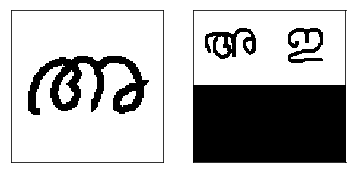

Got an average of 0.0% 2 way one-shot learning accuracy 

Current best: 0.0, previous best: -1

 ------------- 

Time for 10 iterations: 0.18759874105453492 mins
Train Loss: 6.21756649017334
Evaluating model on 1 random 2 way one-shot learning tasks ... 

indices [ 1 19]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


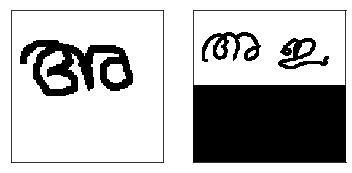

Got an average of 100.0% 2 way one-shot learning accuracy 

Current best: 100.0, previous best: 0.0

 ------------- 

Time for 15 iterations: 0.2980645577112834 mins
Train Loss: 6.118151664733887
Evaluating model on 1 random 2 way one-shot learning tasks ... 

indices [17  7]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


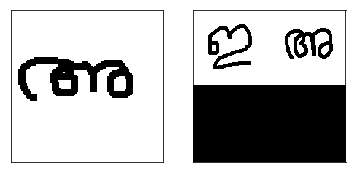

Got an average of 100.0% 2 way one-shot learning accuracy 

Current best: 100.0, previous best: 100.0

 ------------- 

Time for 20 iterations: 0.40565677881240847 mins
Train Loss: 5.975837707519531
Evaluating model on 1 random 2 way one-shot learning tasks ... 

indices [2 3]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


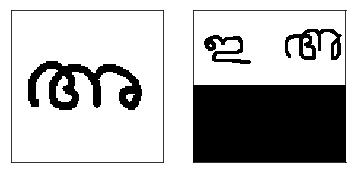

Got an average of 100.0% 2 way one-shot learning accuracy 

Current best: 100.0, previous best: 100.0


In [94]:
# Hyper parameters
evaluate_every = 5 # interval for evaluating on one-shot tasks
batch_size = 10
n_iter = 20 # No. of training iterations
N_way = 2 # how many classes for testing one-shot tasks(Main)
n_val = 1 # how many one-shot tasks to validate on
best = -1
model_path = 'data/'
print("Starting training process!")
print("-------------------------------------")
valacc=[]
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        valacc.append(val_acc)
        model.save_weights(os.path.join(model_path, 'weights.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

In [95]:
nn_accs = []
nn_acc = test_nn_accuracy(N_way, n_val)
valacc.sort()
print(valacc)
print ("Siamese = ", np.mean(valacc))
print("--------------------------------------")
nn_accs.append(nn_acc)
print ("NN Accuracy = ", nn_acc)
print("--------------------------------------")

Evaluating nearest neighbour on 1 unique 2 way one-shot learning tasks ...
indices [1 5]
low 0
high 46
[8, 0]
[0.0, 100.0, 100.0, 100.0]
Siamese =  75.0
--------------------------------------
NN Accuracy =  0.0
--------------------------------------


Starting training process!
-------------------------------------

 ------------- 

Time for 5 iterations: 0.10183402299880981 mins
Train Loss: 5.852130889892578
Evaluating model on 2 random 2 way one-shot learning tasks ... 

indices [1 9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


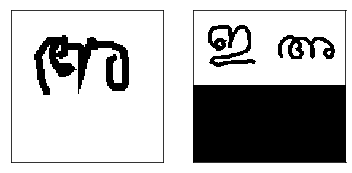

indices [18  3]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


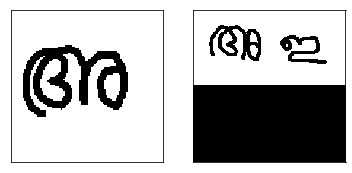

Got an average of 100.0% 2 way one-shot learning accuracy 

Current best: 100.0, previous best: -1

 ------------- 

Time for 10 iterations: 0.2165380040804545 mins
Train Loss: 5.733119487762451
Evaluating model on 2 random 2 way one-shot learning tasks ... 

indices [ 3 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


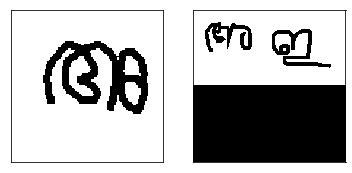

indices [14 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


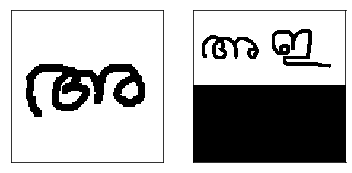

Got an average of 100.0% 2 way one-shot learning accuracy 

Current best: 100.0, previous best: 100.0

 ------------- 

Time for 15 iterations: 0.3302235205968221 mins
Train Loss: 5.623098850250244
Evaluating model on 2 random 2 way one-shot learning tasks ... 

indices [15  8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


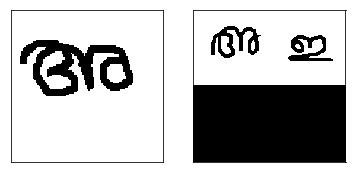

indices [5 1]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


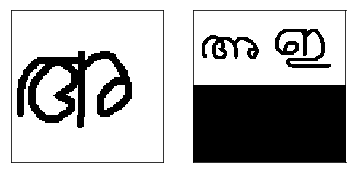

Got an average of 50.0% 2 way one-shot learning accuracy 


 ------------- 

Time for 20 iterations: 0.44967204332351685 mins
Train Loss: 5.508593559265137
Evaluating model on 2 random 2 way one-shot learning tasks ... 

indices [ 6 18]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


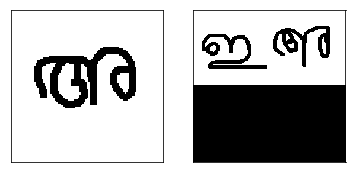

indices [15  1]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


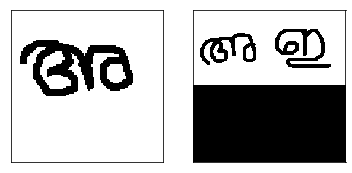

Got an average of 100.0% 2 way one-shot learning accuracy 

Current best: 100.0, previous best: 100.0


In [96]:
# Hyper parameters
evaluate_every = 5 # interval for evaluating on one-shot tasks
batch_size = 10
n_iter = 20 # No. of training iterations
N_way = 2 # how many classes for testing one-shot tasks(Main)
n_val = 2 # how many one-shot tasks to validate on
best = -1
model_path = 'data/'
print("Starting training process!")
print("-------------------------------------")
valacc=[]
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        valacc.append(val_acc)
        model.save_weights(os.path.join(model_path, 'weights.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc


In [97]:
nn_accs = []
nn_acc = test_nn_accuracy(N_way, n_val)
valacc.sort()
print ("Siamese = ", np.mean(valacc))
print("--------------------------------------")
nn_accs.append(nn_acc)
print ("NN Accuracy = ", nn_acc)
print("--------------------------------------")

Evaluating nearest neighbour on 2 unique 2 way one-shot learning tasks ...
indices [ 0 14]
low 0
high 46
[8, 0]
indices [ 7 18]
low 0
high 46
[8, 0]
Siamese =  87.5
--------------------------------------
NN Accuracy =  50.0
--------------------------------------


Starting training process!
-------------------------------------

 ------------- 

Time for 5 iterations: 0.10120633840560914 mins
Train Loss: 5.39274787902832
Evaluating model on 3 random 2 way one-shot learning tasks ... 

indices [14 11]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


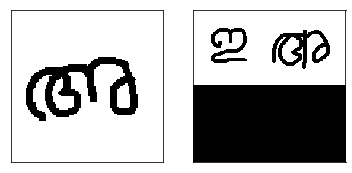

indices [17 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


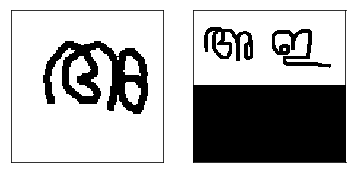

indices [0 3]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


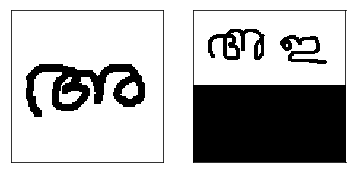

Got an average of 66.66666666666667% 2 way one-shot learning accuracy 

Current best: 66.66666666666667, previous best: -1

 ------------- 

Time for 10 iterations: 0.2199517567952474 mins
Train Loss: 5.291041851043701
Evaluating model on 3 random 2 way one-shot learning tasks ... 

indices [15 11]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


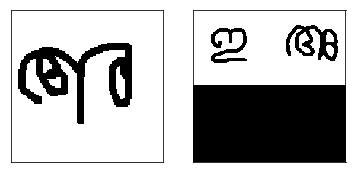

indices [ 9 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


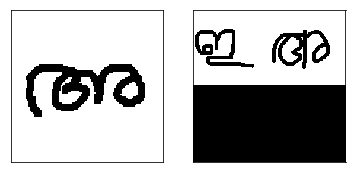

indices [15  0]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


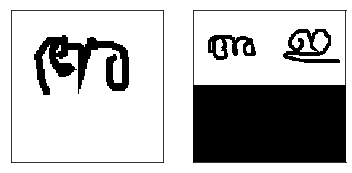

Got an average of 66.66666666666667% 2 way one-shot learning accuracy 

Current best: 66.66666666666667, previous best: 66.66666666666667

 ------------- 

Time for 15 iterations: 0.3366681496302287 mins
Train Loss: 5.183251857757568
Evaluating model on 3 random 2 way one-shot learning tasks ... 

indices [3 5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


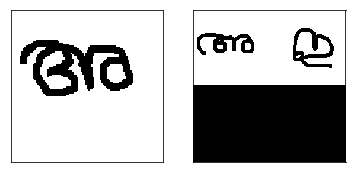

indices [ 5 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


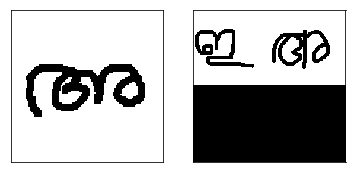

indices [19 13]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


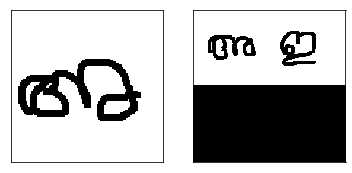

Got an average of 66.66666666666667% 2 way one-shot learning accuracy 

Current best: 66.66666666666667, previous best: 66.66666666666667

 ------------- 

Time for 20 iterations: 0.45749034484227497 mins
Train Loss: 5.083977222442627
Evaluating model on 3 random 2 way one-shot learning tasks ... 

indices [ 9 14]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


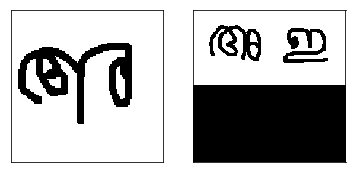

indices [18  2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


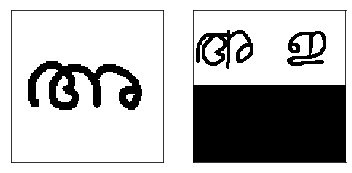

indices [9 3]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


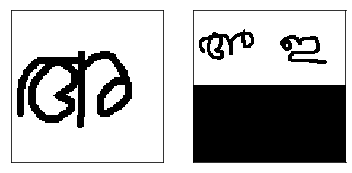

Got an average of 33.333333333333336% 2 way one-shot learning accuracy 



In [98]:
# Hyper parameters
evaluate_every = 5 # interval for evaluating on one-shot tasks
batch_size = 10
n_iter = 20 # No. of training iterations
N_way = 2 # how many classes for testing one-shot tasks(Main)
n_val = 3 # how many one-shot tasks to validate on
best = -1
model_path = 'data/'
print("Starting training process!")
print("-------------------------------------")
valacc=[]
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        valacc.append(val_acc)
        model.save_weights(os.path.join(model_path, 'weights.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc


In [99]:
nn_accs = []
nn_acc = test_nn_accuracy(N_way, n_val)
valacc.sort()
print ("Siamese = ", np.mean(valacc))
print("--------------------------------------")
nn_accs.append(nn_acc)
print ("NN Accuracy = ", nn_acc)
print("--------------------------------------")

Evaluating nearest neighbour on 3 unique 2 way one-shot learning tasks ...
indices [10  2]
low 0
high 46
[8, 0]
indices [12 15]
low 0
high 46
[8, 0]
indices [11  7]
low 0
high 46
[8, 0]
Siamese =  58.33333333333334
--------------------------------------
NN Accuracy =  66.66666666666667
--------------------------------------


Starting training process!
-------------------------------------

 ------------- 

Time for 5 iterations: 0.10047281185785929 mins
Train Loss: 4.987099647521973
Evaluating model on 6 random 2 way one-shot learning tasks ... 

indices [0 9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


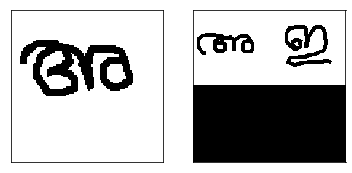

indices [ 5 13]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


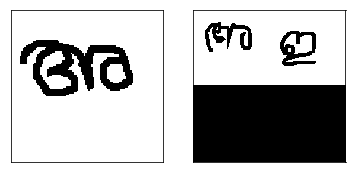

indices [15  7]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


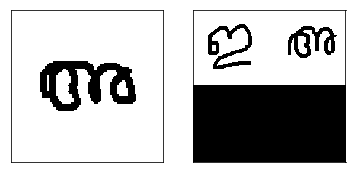

indices [17 15]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


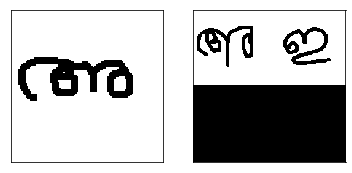

indices [19 18]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


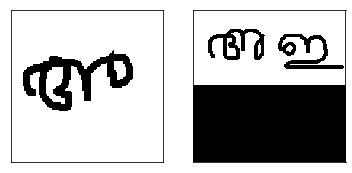

indices [ 7 18]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


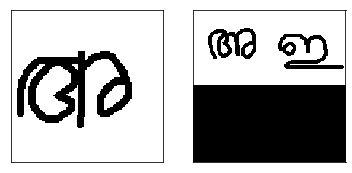

Got an average of 66.66666666666667% 2 way one-shot learning accuracy 

Current best: 66.66666666666667, previous best: -1

 ------------- 

Time for 10 iterations: 0.22763709227244058 mins
Train Loss: 4.895179748535156
Evaluating model on 6 random 2 way one-shot learning tasks ... 

indices [19  5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


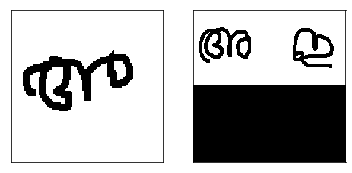

indices [10  2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


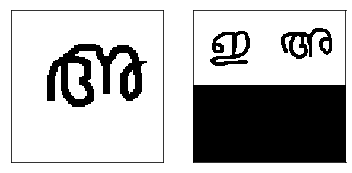

indices [ 5 17]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


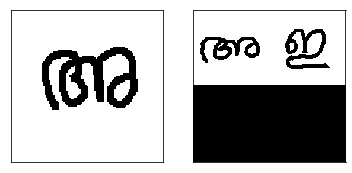

indices [ 5 14]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


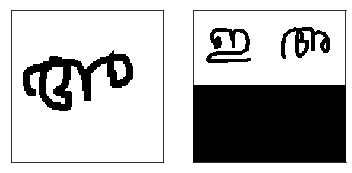

indices [11 16]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


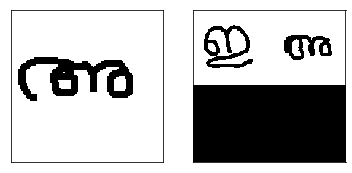

indices [ 4 15]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


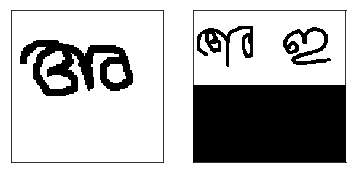

Got an average of 33.333333333333336% 2 way one-shot learning accuracy 


 ------------- 

Time for 15 iterations: 0.3568723678588867 mins
Train Loss: 4.801364421844482
Evaluating model on 6 random 2 way one-shot learning tasks ... 

indices [11 16]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


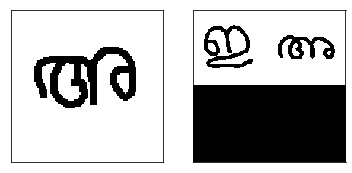

indices [0 5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


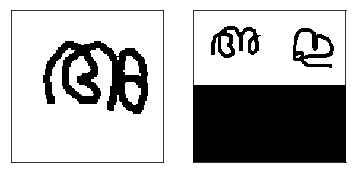

indices [1 1]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


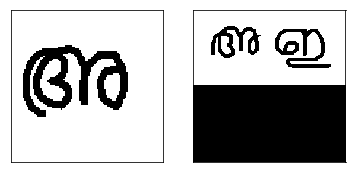

indices [11  6]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


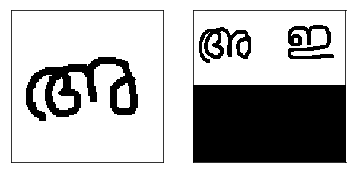

indices [18 18]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


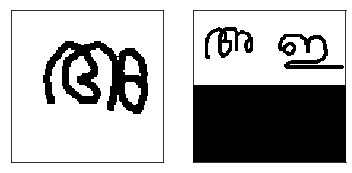

indices [17  5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


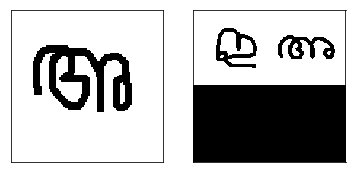

Got an average of 83.33333333333333% 2 way one-shot learning accuracy 

Current best: 83.33333333333333, previous best: 66.66666666666667

 ------------- 

Time for 20 iterations: 0.48479334910710653 mins
Train Loss: 4.717746257781982
Evaluating model on 6 random 2 way one-shot learning tasks ... 

indices [ 7 14]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


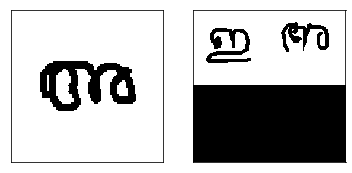

indices [16  4]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


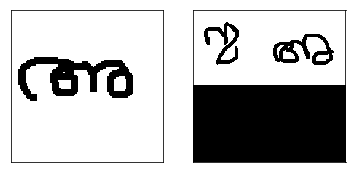

indices [2 9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


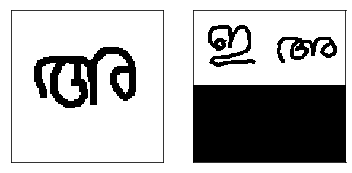

indices [18 16]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


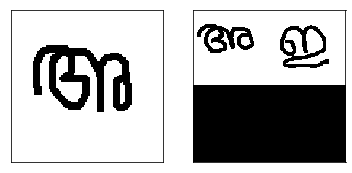

indices [14  4]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


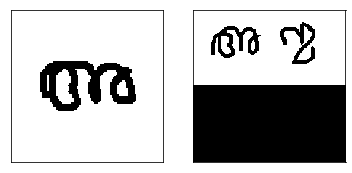

indices [6 4]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


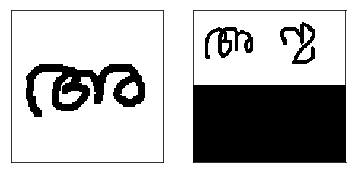

Got an average of 50.0% 2 way one-shot learning accuracy 



In [100]:
# Hyper parameters
evaluate_every = 5 # interval for evaluating on one-shot tasks
batch_size = 10
n_iter = 20 # No. of training iterations
N_way = 2 # how many classes for testing one-shot tasks(Main)
n_val = 6 # how many one-shot tasks to validate on
best = -1
model_path = 'data/'
print("Starting training process!")
print("-------------------------------------")
valacc=[]
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        valacc.append(val_acc)
        model.save_weights(os.path.join(model_path, 'weights.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc


In [101]:
nn_accs = []
nn_acc = test_nn_accuracy(N_way, n_val)
valacc.sort()
print ("Siamese = ", np.mean(valacc))
print("--------------------------------------")
nn_accs.append(nn_acc)
print ("NN Accuracy = ", nn_acc)
print("--------------------------------------")

Evaluating nearest neighbour on 6 unique 2 way one-shot learning tasks ...
indices [2 5]
low 0
high 46
[8, 0]
indices [14 12]
low 0
high 46
[8, 0]
indices [17  1]
low 0
high 46
[8, 0]
indices [19 17]
low 0
high 46
[8, 0]
indices [ 6 18]
low 0
high 46
[8, 0]
indices [9 4]
low 0
high 46
[8, 0]
Siamese =  58.33333333333333
--------------------------------------
NN Accuracy =  83.33333333333333
--------------------------------------


Starting training process!
-------------------------------------

 ------------- 

Time for 5 iterations: 0.10210465987523397 mins
Train Loss: 4.628028392791748
Evaluating model on 8 random 2 way one-shot learning tasks ... 

indices [10 13]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


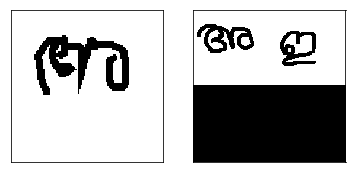

indices [14 16]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


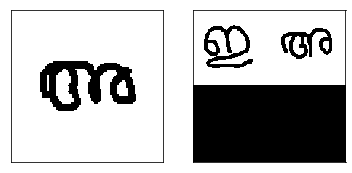

indices [ 8 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


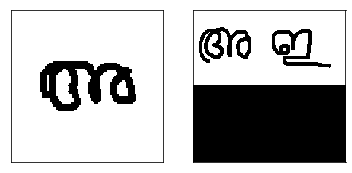

indices [ 6 14]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


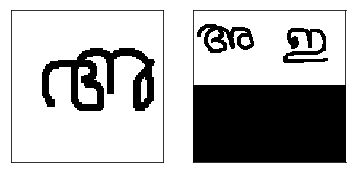

indices [17  4]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


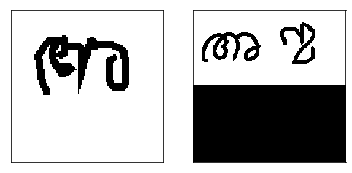

indices [9 5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


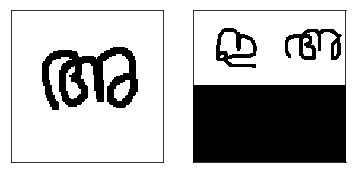

indices [ 9 13]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


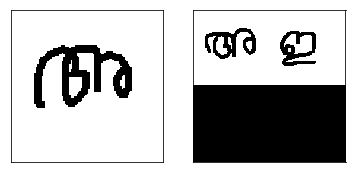

indices [14  9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


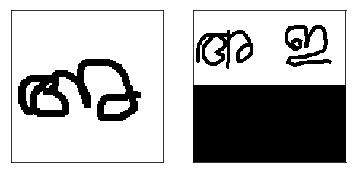

Got an average of 50.0% 2 way one-shot learning accuracy 

Current best: 50.0, previous best: -1

 ------------- 

Time for 10 iterations: 0.23963091373443604 mins
Train Loss: 4.543022632598877
Evaluating model on 8 random 2 way one-shot learning tasks ... 

indices [2 2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


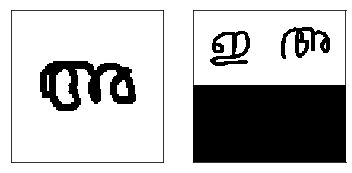

indices [19  5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


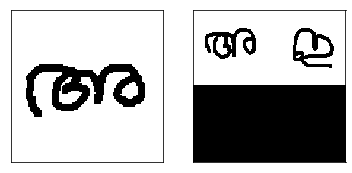

indices [11 16]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


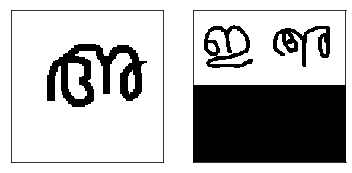

indices [1 0]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


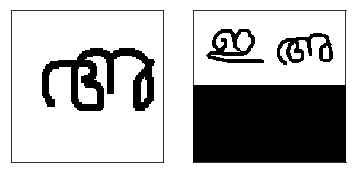

indices [16 16]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


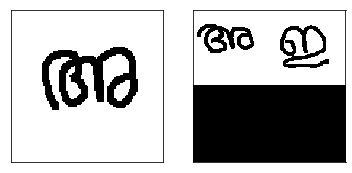

indices [13 17]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


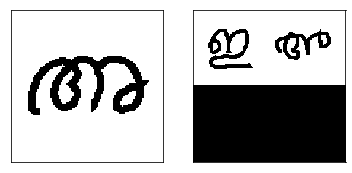

indices [17  7]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


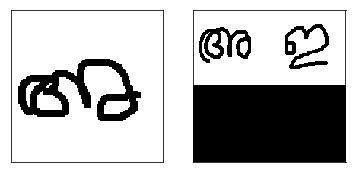

indices [13 10]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


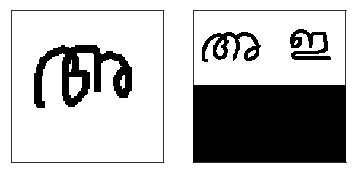

Got an average of 75.0% 2 way one-shot learning accuracy 

Current best: 75.0, previous best: 50.0

 ------------- 

Time for 15 iterations: 0.37556099096934 mins
Train Loss: 4.46164608001709
Evaluating model on 8 random 2 way one-shot learning tasks ... 

indices [11  8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


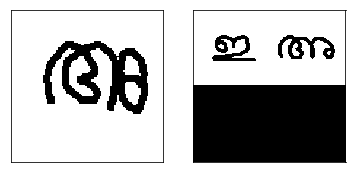

indices [14  8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


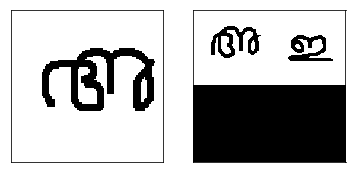

indices [18 11]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


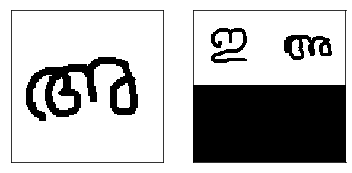

indices [15  8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


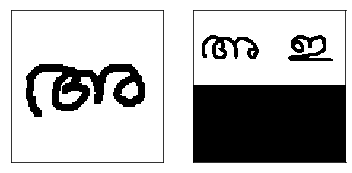

indices [18  1]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


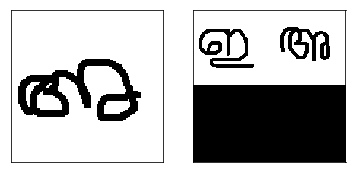

indices [19 19]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


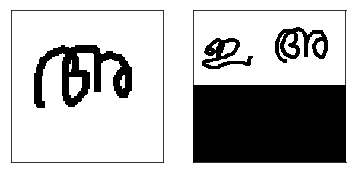

indices [ 1 11]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


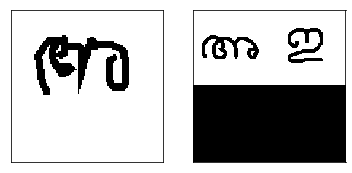

indices [16 11]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


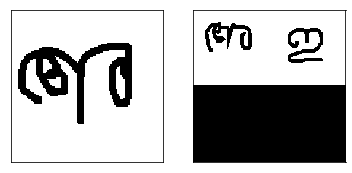

Got an average of 62.5% 2 way one-shot learning accuracy 


 ------------- 

Time for 20 iterations: 0.505398694674174 mins
Train Loss: 4.3876166343688965
Evaluating model on 8 random 2 way one-shot learning tasks ... 

indices [11  7]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


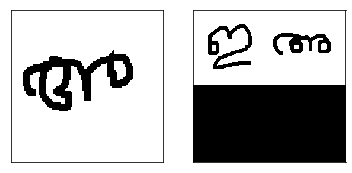

indices [14 11]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


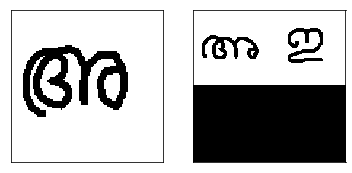

indices [ 7 14]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


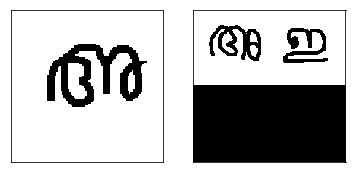

indices [6 9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


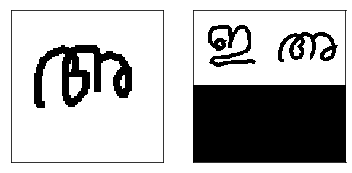

indices [15 17]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


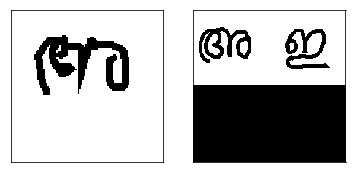

indices [ 1 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


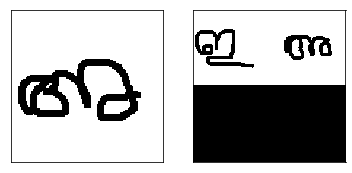

indices [1 6]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


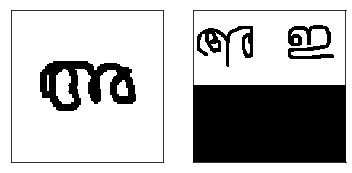

indices [7 1]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


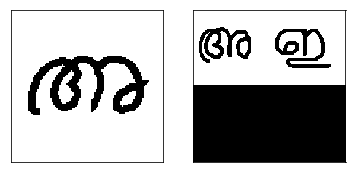

Got an average of 75.0% 2 way one-shot learning accuracy 

Current best: 75.0, previous best: 75.0


In [102]:
# Hyper parameters
evaluate_every = 5 # interval for evaluating on one-shot tasks
batch_size = 10
n_iter = 20 # No. of training iterations
N_way = 2 # how many classes for testing one-shot tasks(Main)
n_val = 8 # how many one-shot tasks to validate on
best = -1
model_path = 'data/'
print("Starting training process!")
print("-------------------------------------")
valacc=[]
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        valacc.append(val_acc)
        model.save_weights(os.path.join(model_path, 'weights.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc


In [103]:
nn_accs = []
nn_acc = test_nn_accuracy(N_way, n_val)
valacc.sort()
print ("Siamese = ", np.mean(valacc))
print("--------------------------------------")
nn_accs.append(nn_acc)
print ("NN Accuracy = ", nn_acc)
print("--------------------------------------")

Evaluating nearest neighbour on 8 unique 2 way one-shot learning tasks ...
indices [18  0]
low 0
high 46
[8, 0]
indices [12  4]
low 0
high 46
[8, 0]
indices [13  6]
low 0
high 46
[8, 0]
indices [0 2]
low 0
high 46
[8, 0]
indices [19 10]
low 0
high 46
[8, 0]
indices [ 7 15]
low 0
high 46
[8, 0]
indices [12  6]
low 0
high 46
[8, 0]
indices [13 10]
low 0
high 46
[8, 0]
Siamese =  65.625
--------------------------------------
NN Accuracy =  37.5
--------------------------------------


Starting training process!
-------------------------------------

 ------------- 

Time for 5 iterations: 0.10053452253341674 mins
Train Loss: 4.311882495880127
Evaluating model on 10 random 2 way one-shot learning tasks ... 

indices [3 0]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


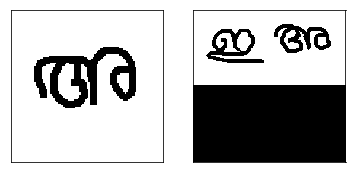

indices [11  0]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


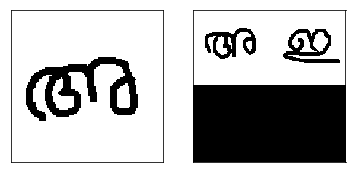

indices [ 4 13]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


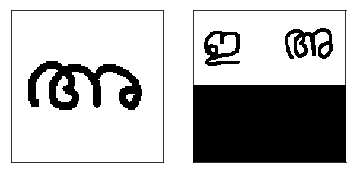

indices [ 2 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


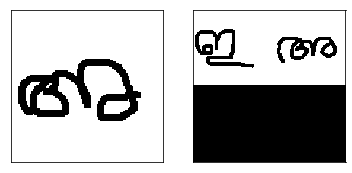

indices [14  2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


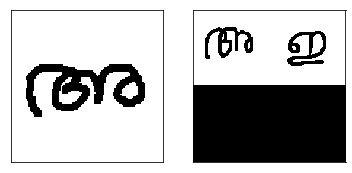

indices [7 7]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


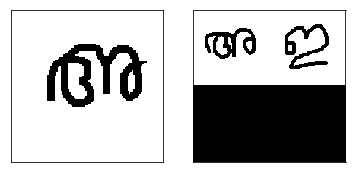

indices [17  9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


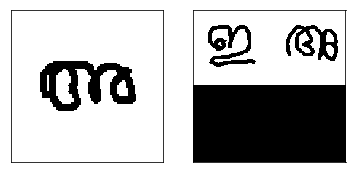

indices [10 17]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


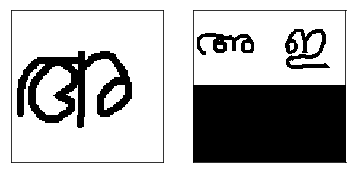

indices [12  9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


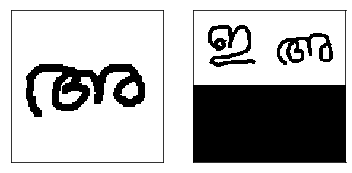

indices [ 9 17]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


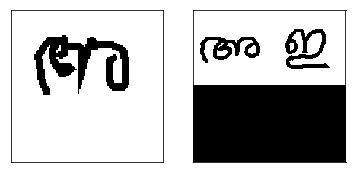

Got an average of 60.0% 2 way one-shot learning accuracy 

Current best: 60.0, previous best: -1

 ------------- 

Time for 10 iterations: 0.23478993972142537 mins
Train Loss: 4.237646102905273
Evaluating model on 10 random 2 way one-shot learning tasks ... 

indices [ 4 17]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


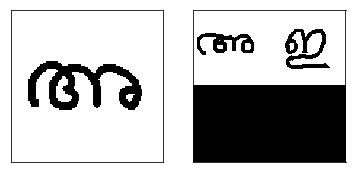

indices [ 6 17]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


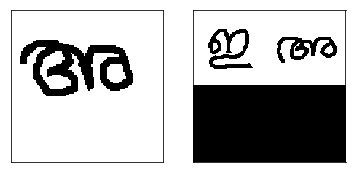

indices [3 3]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


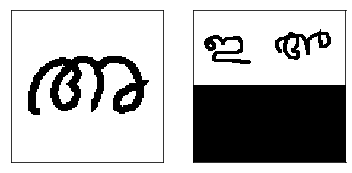

indices [13 10]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


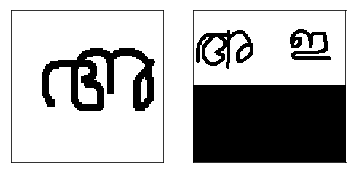

indices [6 2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


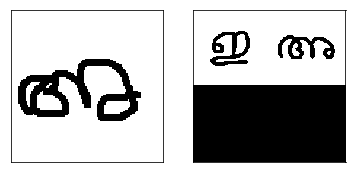

indices [15  9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


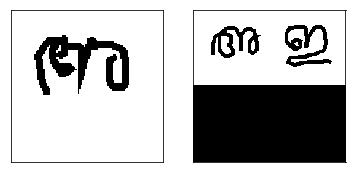

indices [10  8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


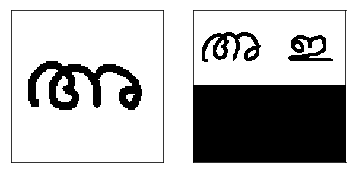

indices [1 7]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


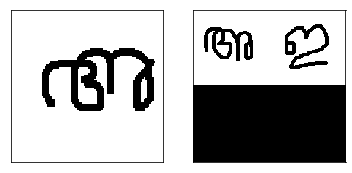

indices [5 1]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


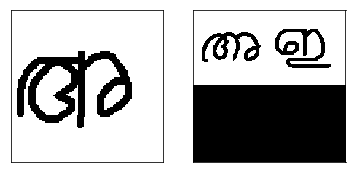

indices [10 15]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


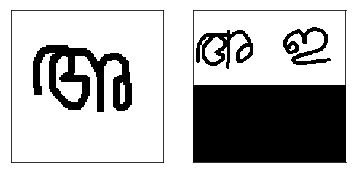

Got an average of 60.0% 2 way one-shot learning accuracy 

Current best: 60.0, previous best: 60.0

 ------------- 

Time for 15 iterations: 0.3731884241104126 mins
Train Loss: 4.168159484863281
Evaluating model on 10 random 2 way one-shot learning tasks ... 

indices [14 10]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


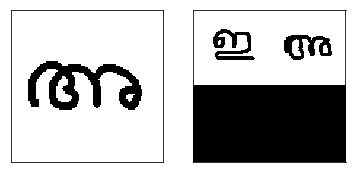

indices [ 3 15]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


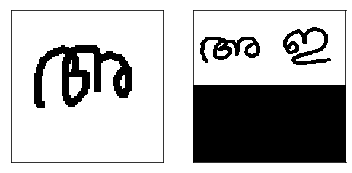

indices [ 6 12]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


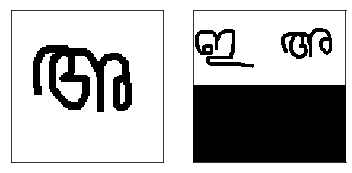

indices [16  9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


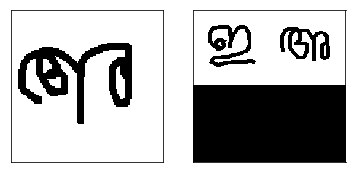

indices [14  8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


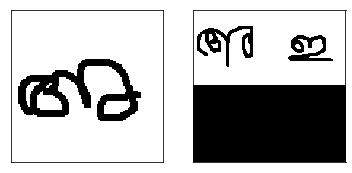

indices [ 0 16]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


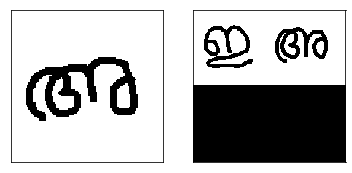

indices [7 5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


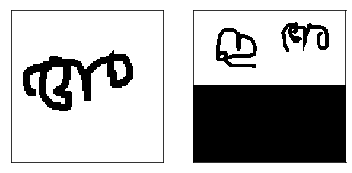

indices [16 14]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


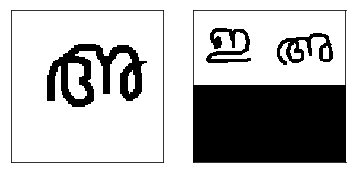

indices [17 13]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


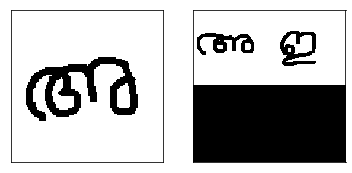

indices [18  2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


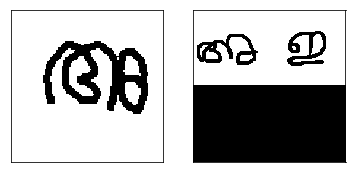

Got an average of 20.0% 2 way one-shot learning accuracy 


 ------------- 

Time for 20 iterations: 0.510463535785675 mins
Train Loss: 4.0977983474731445
Evaluating model on 10 random 2 way one-shot learning tasks ... 

indices [19 15]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


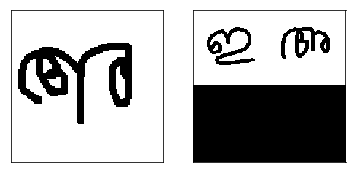

indices [11 19]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


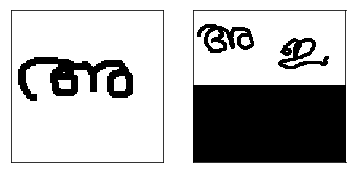

indices [5 8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


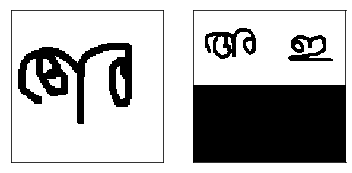

indices [13  5]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


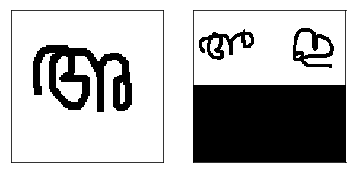

indices [ 1 19]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


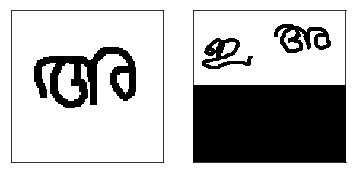

indices [2 2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


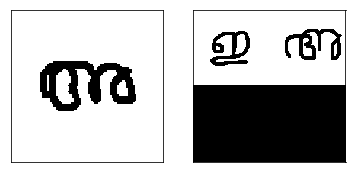

indices [12  8]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


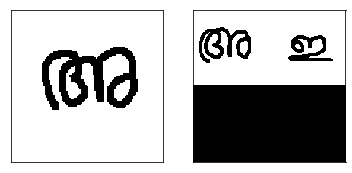

indices [2 2]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


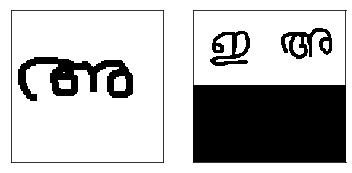

indices [16  9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


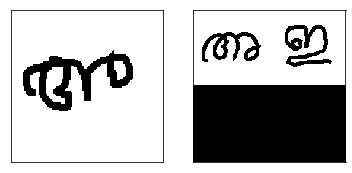

indices [1 9]
low 0
high 46
[8, 0]
nc 2
n 2
example 0
example 1


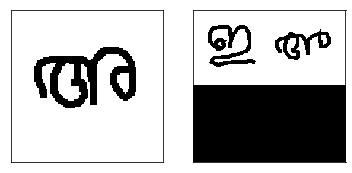

Got an average of 80.0% 2 way one-shot learning accuracy 

Current best: 80.0, previous best: 60.0


In [104]:
# Hyper parameters
evaluate_every = 5 # interval for evaluating on one-shot tasks
batch_size = 10
n_iter = 20 # No. of training iterations
N_way = 2 # how many classes for testing one-shot tasks(Main)
n_val = 10 # how many one-shot tasks to validate on
best = -1
model_path = 'data/'
print("Starting training process!")
print("-------------------------------------")
valacc=[]
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        valacc.append(val_acc)
        model.save_weights(os.path.join(model_path, 'weights.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc


In [105]:
nn_accs = []
nn_acc = test_nn_accuracy(N_way, n_val)
valacc.sort()
print ("Siamese = ", np.mean(valacc))
print("--------------------------------------")
nn_accs.append(nn_acc)
print ("NN Accuracy = ", nn_acc)
print("--------------------------------------")

Evaluating nearest neighbour on 10 unique 2 way one-shot learning tasks ...
indices [0 5]
low 0
high 46
[8, 0]
indices [ 6 17]
low 0
high 46
[8, 0]
indices [ 4 16]
low 0
high 46
[8, 0]
indices [1 9]
low 0
high 46
[8, 0]
indices [8 1]
low 0
high 46
[8, 0]
indices [19 16]
low 0
high 46
[8, 0]
indices [18  2]
low 0
high 46
[8, 0]
indices [17 13]
low 0
high 46
[8, 0]
indices [ 8 14]
low 0
high 46
[8, 0]
indices [6 4]
low 0
high 46
[8, 0]
Siamese =  55.0
--------------------------------------
NN Accuracy =  60.0
--------------------------------------
